In [19]:
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline

In [20]:
# Creando un función para retornar un vector con valores aleatorios 
def gen_rand_vector(n,ls=5.1):
    v=[]

    #Creando un vector de n elementos con valores entre 0 y ls
    for i in range(n):
        v.append(random.random()*ls)

    # Tomando un sólo decimal
    return [int(i*10)/10 for i in v]
            

In [21]:
n =1000
notas = pd.DataFrame({
    'N1': gen_rand_vector(n,5.1),
    'N2': gen_rand_vector(n,5.1),
    'N3': gen_rand_vector(n,5.1),
    'N4': gen_rand_vector(n,5.1),
    'P': gen_rand_vector(n,5.1),
    'F': gen_rand_vector(n,5.1),
    'def':[0 for i in range(n)],
    'aprobado':[0 for j in range(n)]
})

In [22]:
val_seg = 0.4
val_par = 0.3
val_fin = 0.3

#Calculamos el valor de la nota definitiva
notas['def'] = round(((notas.N1 + notas.N2 + notas.N3 + notas.N4)*val_seg/4)+(notas.P*val_par)+(notas.F*val_fin),1)

#Calculamos si aprueba (1) o no (0)
notas['aprobado'] = pd.Series([1 if i >= 3 else 0 for i in notas['def']])
notas.head(10)

,N1,N2,N3,N4,P,F,def,aprobado
0,2.5,3.1,4.5,3.5,2.2,5.0,3.5,1
1,0.1,1.5,1.4,1.5,2.4,0.0,1.2,0
2,1.1,1.3,4.4,0.3,0.2,0.7,1.0,0
3,1.8,1.3,3.9,2.2,3.4,2.7,2.8,0
4,4.5,2.0,0.4,4.2,0.5,0.0,1.3,0
5,4.4,0.7,1.0,3.6,1.0,3.5,2.3,0
6,4.5,1.9,3.8,0.9,3.9,3.5,3.3,1
7,0.5,4.6,2.9,2.3,2.3,1.1,2.0,0
8,0.7,1.1,1.7,4.8,3.1,0.0,1.8,0
9,2.6,3.5,0.5,1.4,1.1,2.7,1.9,0


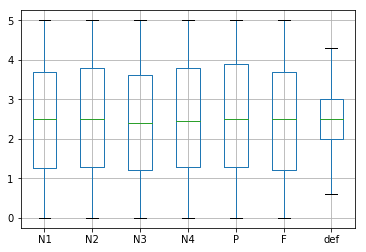

In [23]:
notas.drop('aprobado',axis = 1).boxplot()

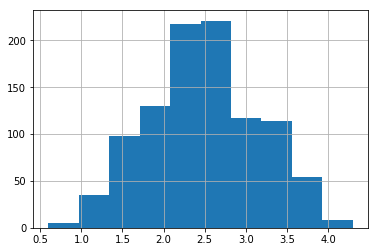

In [24]:
# Concentración de las notas definitivas
notas['def'].hist()

In [25]:
# Número de aprobados
notas['aprobado'][notas['aprobado'] == 1].count()

261

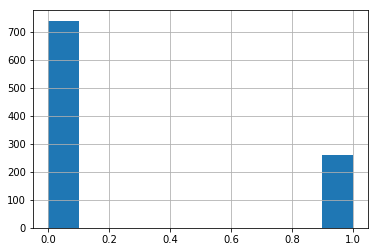

In [26]:
# Proporcion de aprobados y reprobados
notas['aprobado'].hist()

In [27]:
X = notas.drop(['F','N4','def','aprobado'],axis=1)
y = notas['aprobado']

In [28]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# Prediciendo resultados a partir del entrenamiento
# estructura de los datos predecir [N1,N2,N3,P]
model.predict([[3.2,4.1,2.5,2.0],
              [2.4,3.2,5.0,3.8],
              [1.7,2.2,2.4,4.4]])

array([0, 1, 0])